In [1]:
## ANTUD JNOTEBOOK fail peab asuma kõikide kaustade ülemkataloogis, siis on failiteed korrektsed järgnevate skriptide suhtes.
# Kustutab kõik kaustad, mis lõppevad .ceg lõpuga.
import os
import shutil

# Get the current path
path = os.getcwd()

# Iterate over all subdirectories in the current path
for root, dirs, files in os.walk(path):
    # Iterate over all directories in the current subdirectory
    for dir in dirs:
        # Check if the directory name ends with ".ceg"
        if dir.endswith(".ceg"):
            # Delete the directory
            dir_path = os.path.join(root, dir)
            # Change the permissions on the directory to allow deletion
            os.chmod(dir_path, 0o777)
            # Delete the directory
            shutil.rmtree(dir_path)


In [2]:
# Antud lõik kustutab kõik iga õpilase poolikud esitused ja jätab alles viimase esituse.
import os
import re
import shutil

# Niipidi loopida saab õpilase kaupa reasatda kohe
# Loop through each subdirectory
for j in range(1, 377):
    # Loop through each directory
    for i in range(1, 16):
        # Generate the directory name using string formatting
        directory = './K{:02d}/S{:03d}'.format(i, j)

        # Check if the directory exists
        if os.path.exists(directory):
            # Get the list of all files in the directory
            dir_list = os.listdir(directory)

            # Find all files that match the pattern
            dir_list = [f for f in dir_list if re.match(r'\d{4}-\d{2}-\d{2}-\d{2}-\d{2}-\d{2}', f)]

            # Sort the list of files
            dir_list.sort(reverse=True)

            # Check if the list is not empty
            if dir_list:
                # Print the first element
                # print(dir_list[0])

                # Delete all files in the directory except for the first one
                for f in dir_list[1:]:
                    # Delete the directory
                    dir_path = os.path.join(directory, f)
                    # Change the permissions on the directory to allow deletion
                    os.chmod(dir_path, 0o777)
                    # Delete the directory
                    shutil.rmtree(dir_path)

In [3]:
# See kood kustutab igas koodis kommentaarid ja tühjad read.
import re
import os
import shutil

# Loop through each subdirectory
for j in range(1, 377):
    # Loop through each directory
    for i in range(1, 16):
        # Generate the directory name using string formatting
        directory = './K{:02d}/S{:03d}'.format(i, j)

        # Check if the directory exists
        if os.path.exists(directory):
            # Get the list of all files in the directory
            dir_list = os.listdir(directory)

            # Find all files that match the pattern
            dir_list = [f for f in dir_list if re.match(r'\d{4}-\d{2}-\d{2}-\d{2}-\d{2}-\d{2}', f)]

            # Sort the list of files
            dir_list.sort(reverse=True)

            # Check if the list is not empty
            if dir_list:
                # Print the first element
                # print(dir_list[0])
                # Get the path of the first directory in the list
                dir_path = os.path.join(directory, dir_list[0])
                

                # Loop through each file in the directory
                for file in os.listdir(dir_path):
                    if file.endswith('.py'):
                        pyfile_path = os.path.join(dir_path, file)
                        # Open the Python file and read its contents
                        if os.path.exists(pyfile_path):
                            with open(pyfile_path, 'r', encoding='iso-8859-1') as f:
                                contents = f.read()

                            # Use the re module to match and remove inline comments
                            no_inline_comments = re.sub(r'\s*#.*', '', contents)
                            uus = re.sub(r'^\s*\n', '', no_inline_comments, flags=re.MULTILINE)
                            # Write the resulting string to a new file
                            with open(pyfile_path, 'w', encoding='iso-8859-1') as f:
                                f.write(uus)
                        else:
                            pass

In [42]:
import re
import os
import shutil

# Create an empty dictionary
students = {}

# Loop through each subdirectory
for j in range(1, 377):
    # Loop through each directory
    for i in range(1, 16):
        # Generate the directory name using string formatting
        directory = './K{:02d}/S{:03d}'.format(j, i)

        # Check if the directory exists
        if os.path.exists(directory):
            # Get the list of all files in the directory
            dir_list = os.listdir(directory)

            # Find all files that match the pattern
            dir_list = [f for f in dir_list if re.match(r'\d{4}-\d{2}-\d{2}-\d{2}-\d{2}-\d{2}', f)]

            # Sort the list of files
            dir_list.sort(reverse=True)

            # Check if the list is not empty
            if dir_list:
                # Print the first element
                # print(dir_list[0])
                # Get the path of the first directory in the list
                dir_path = os.path.join(directory, dir_list[0])

                # Loop through each file in the directory
                for file in os.listdir(dir_path):
                    if file.endswith('.py'):
                        pyfile_path = os.path.join(dir_path, file)
                        # Generate the student number using string formatting
                        student_number = "K{:02d}".format(j)
                        # Check if the student is already in the dictionary
                        if student_number not in students:
                            # If not, add the student to the dictionary with an empty list
                            students[student_number] = []
                        # Add the file path to the list of the student
                        students[student_number].append(pyfile_path)


In [232]:
# Saab iga kodutöö sõnastikust vastavalt K01...K15
file_paths = students["K15"]
file_paths

# for file in file_paths:
#     with open(file, 'r') as f:
#         # Read the contents of the file
#         contents = f.read()
#         # Print the contents of the file
#         print(contents)

# Extract the filenames from the paths
filenames = [os.path.basename(path) for path in file_paths]

# Create a set of unique filenames
unique_filenames = set(filenames)

# Print the unique filenames
unique_filenames = sorted(unique_filenames)
print(unique_filenames)


suur_list = []
list = []
for homeworkNumber in unique_filenames:
    for path in file_paths:
        if os.path.basename(path) == homeworkNumber:
            list.append(path)
    
    suur_list.append(list)
    list = []
    
print(suur_list)

['kodu1.py', 'kodu2.py', 'kodu3.py']
[['./K15/S001\\2021-12-09-02-45-18\\kodu1.py', './K15/S002\\2021-12-08-22-14-35\\kodu1.py', './K15/S007\\2021-12-07-22-33-43\\kodu1.py', './K15/S010\\2021-12-09-05-17-03\\kodu1.py', './K15/S011\\2021-12-09-00-13-20\\kodu1.py', './K15/S012\\2021-12-08-19-00-52\\kodu1.py', './K15/S013\\2021-12-07-17-14-13\\kodu1.py'], ['./K15/S001\\2021-12-09-02-45-18\\kodu2.py', './K15/S002\\2021-12-08-22-14-35\\kodu2.py', './K15/S007\\2021-12-07-22-33-43\\kodu2.py', './K15/S010\\2021-12-09-05-17-03\\kodu2.py', './K15/S011\\2021-12-09-00-13-20\\kodu2.py', './K15/S012\\2021-12-08-19-00-52\\kodu2.py', './K15/S013\\2021-12-07-17-14-13\\kodu2.py'], ['./K15/S001\\2021-12-09-02-45-18\\kodu3.py', './K15/S002\\2021-12-08-22-14-35\\kodu3.py', './K15/S007\\2021-12-07-22-33-43\\kodu3.py', './K15/S010\\2021-12-09-05-17-03\\kodu3.py', './K15/S011\\2021-12-09-00-13-20\\kodu3.py', './K15/S012\\2021-12-08-19-00-52\\kodu3.py']]


In [141]:
import os
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read the contents of the files at the given file paths
student_files_content = [open(File).read() for File in file_paths]

# Define a function that takes in a list of source code and returns
# a Tf-idf vectorized representation of the code
def vectorize_source_code(source_code):
    return TfidfVectorizer().fit_transform(source_code).toarray()

# Define a function that takes in two vectors and returns their cosine similarity
def calculate_cosine_similarity(source_code1, source_code2):
    return cosine_similarity([source_code1, source_code2])

# Vectorize the student files
vectors = vectorize_source_code(student_files_content)

# Zip the file paths with the vectors
s_vectors = list(zip(file_paths, vectors))

# Define a function that calculates the cosine similarity between each pair of vectors
# in the given list of vectors, and returns a list of tuples containing the file paths
# of the vectors and their similarity scores
def check_cos_similarity(s_vectors, min_similarity=0.0):
    results = [] # Create a list to store the results

    # Loop through each vector and its corresponding file path
    for i, (student_a, vector_a) in enumerate(s_vectors):
        # Loop through the remaining vectors in the list
        for student_b, vector_b in s_vectors[i+1:]:
            # Calculate the cosine similarity between the current vector and the current remaining vector
            sim_score = calculate_cosine_similarity(vector_a, vector_b)[0][1]

            # Only consider similarity scores that are above the specified minimum
            if sim_score >= min_similarity:
                # Sort the file paths of the two vectors
                stundet_pair = sorted((student_a, student_b))
                # Create a tuple containing the file paths of the two vectors and their similarity score
                score = stundet_pair[0], stundet_pair[1], sim_score
                # Add the tuple to the list of results
                results.append(score)

    # Sort the results in descending order by similarity score
    results = sorted(results, key=lambda x: x[2], reverse=True)

    # Return the list of results
    return results

# Loop through the results of the cosine similarity calculation
# for d in check_cos_similarity(s_vectors, min_similarity=0.):
#     # Print each result
#     print(d)

In [35]:
import pandas as pd

for i in range(1, 16):
    homework_id = "K" + f"{i:02d}"
    file_path = students.get(homework_id)
    # Read the contents of the files at the given file paths
    student_files_content = [open(File).read() for File in file_paths]


    results = [(d[0], d[1], d[2]) for d in check_cos_similarity(s_vectors, min_similarity=0.6)]

    df = pd.DataFrame(results, columns=['File 1', 'File 2', 'Similarity Score'])

    # Print the DataFrame
    df.style.background_gradient()
#     print(df)

In [79]:
import pandas as pd



file_path = students.get(homework_id)
# Read the contents of the files at the given file paths
student_files_content = [open(File).read() for File in file_paths]


results = [(d[0], d[1], d[2]) for d in check_cos_similarity(s_vectors, min_similarity=0.6)]

df = pd.DataFrame(results, columns=['File 1', 'File 2', 'Similarity Score'])

# Print the DataFrame
df.style.background_gradient()

,File 1,File 2,Similarity Score
0,./K15/S007\2021-12-07-22-33-43\kodu1.py,./K15/S012\2021-12-08-19-00-52\kodu1.py,0.810192
1,./K15/S001\2021-12-09-02-45-18\kodu2.py,./K15/S002\2021-12-08-22-14-35\kodu2.py,0.809882
2,./K15/S001\2021-12-09-02-45-18\kodu2.py,./K15/S013\2021-12-07-17-14-13\kodu2.py,0.701940
3,./K15/S002\2021-12-08-22-14-35\kodu2.py,./K15/S013\2021-12-07-17-14-13\kodu2.py,0.677459
4,./K15/S001\2021-12-09-02-45-18\kodu1.py,./K15/S007\2021-12-07-22-33-43\kodu1.py,0.646583
5,./K15/S001\2021-12-09-02-45-18\kodu1.py,./K15/S012\2021-12-08-19-00-52\kodu1.py,0.640357
6,./K15/S007\2021-12-07-22-33-43\kodu1.py,./K15/S013\2021-12-07-17-14-13\kodu1.py,0.621327
7,./K15/S010\2021-12-09-05-17-03\kodu1.py,./K15/S012\2021-12-08-19-00-52\kodu1.py,0.601127


In [218]:
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

file_paths = students["K14"]

# Read in the Python program files
program_files = [open(File).read() for File in file_paths]
programs = []
for file in program_files:
    programs.append(file)

# Tokenize the programs using NLTK
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = [tokenizer.tokenize(program) for program in programs]
token_strings = []
for token in tokens:
    token_string = ' '.join(token)
    token_strings.append(token_string) # siin saab token stringide listi, kus sõnad on tehtud paljaks ja lowercaseiks

    
    
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the token strings
vectorizer.fit(token_strings)

# Transform the token strings into vectors
vectors = vectorizer.transform(token_strings)
    
    
# # Vectorize the tokens using TF-IDF
# vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform(token_strings)

# Cluster the programs using k-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(vectors)


X = vectors
# Print the cluster labels
print(kmeans.labels_)

nimed = []
import os
import re
for file in file_paths:
    # Use a regular expression to match the student ID in the file path
    match = re.search(r"S(\d+)", file)
    # Extract the student ID from the match object and convert it to a number
    student_id = int(match.group(1))
    # Use the basename and splitext methods to extract the file name and extension
    file_name = os.path.basename(file)
    nimi = str(student_id) + "_" + file_name
    nimed.append(nimi)

print(nimed)

klastrid = [][]
for i in range(len(nimed)):
    for j in range(len(nimed)):
    if kmeans.labels_[i] not in klastrid:
        klastrid.append(kmeans.labels_[i])
        


[1 0 1 0 1 1 3 1 3 1 1 3 1 2 1 3]
['1_kodu1.py', '1_kodu2.py', '2_kodu1.py', '2_kodu2.py', '3_kodu1.py', '6_kodu1.py', '6_kodu2.py', '7_kodu1.py', '7_kodu2.py', '8_kodu1.py', '10_kodu1.py', '10_kodu2.py', '11_kodu1.py', '11_kodu2.py', '12_kodu1.py', '12_kodu2.py']


[[0 0 1 ... 0 0 0]
 [0 0 0 ... 2 3 0]
 [2 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 4 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 2 3 0]]
[0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0]
[0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0]


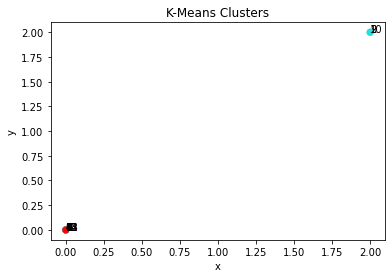

In [221]:
# Import the necessary modules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Convert vectors to a NumPy array
vectors2 = vectors.toarray()
print(vectors2)
print(vectors2[:, 0])
print(vectors2[:, 1])

# labels = kmeans.predict(vectors)
plt.scatter(vectors2[:, 0], vectors2[:, 1], c=kmeans.labels_, cmap='rainbow')

# Add labels to the points in the scatter plot
for i in range(vectors.shape[0]):
    plt.annotate(i, (vectors[i, 0], vectors[i, 1]), fontsize=10)

# Get the coordinates of the cluster centroids
# centroids = kmeans.cluster_centers_

# Extract the x and y coordinates of the centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=2, c="black")

plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Means Clusters")

# Show the plot
plt.show()


In [211]:
import pandas as pd

# Create a DataFrame with the cluster labels for each program file
cluster_labels = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
cluster_labels = cluster_labels.assign(StudentID_work=nimed)

# Print the DataFrame
cluster_labels


,Cluster,StudentID_work
0,1,1_kodu1.py
1,0,1_kodu2.py
2,1,2_kodu1.py
3,0,2_kodu2.py
4,1,3_kodu1.py
5,1,6_kodu1.py
6,3,6_kodu2.py
7,1,7_kodu1.py
8,3,7_kodu2.py
9,1,8_kodu1.py
